# Creating Base Station Sectors in Python
### Creating sectors in GeoJSON format to plot on a scatter mapbox

In [1]:
import numpy as np
import pandas as pd
from numpy import pi, sin, cos
import plotly.graph_objs as go
import math

In [2]:
def degree2rad(degrees):
    return degrees * pi / 180


def sec_poly(long, lat, bearing, radius=0.5, vbw=60):
    R = 6378.1  # Radius of the Earth
    rad_bearing = degree2rad(bearing)

    site_lat = math.radians(lat)  # site lat point converted to radians
    site_lon = math.radians(long)  # site long point converted to radians

    coords = []
    n = 5
    t = np.linspace(degree2rad(bearing - (vbw / 2)), degree2rad(bearing + (vbw / 2)), n)
    for brg in t:
        bor_lat = math.asin(math.sin(site_lat) * math.cos(radius / R) + math.cos(site_lat) * math.sin(radius / R) * math.cos(brg))
        bor_lon = site_lon + math.atan2(math.sin(brg) * math.sin(radius / R) * math.cos(site_lat),
                                    math.cos(radius / R) - math.sin(site_lat) * math.sin(bor_lat))

        bor_lat = math.degrees(bor_lat)
        bor_lon = math.degrees(bor_lon)

        coords.append([bor_lon, bor_lat])

    coords.insert(0, [long, lat])
    coords.append([long, lat])

    return (coords)

In [3]:
# loading the Sector_DB file
sector_df = pd.read_excel("Sector_DB.xlsx")
sector_df.head(3)

Sector  LATITUDE  LONGITUDE  AZIMUTH        TA
0  Sector_01A  36.29248  59.608901       20  0.377900
1  Sector_01B  36.29248  59.608901      140  0.357291
2  Sector_01C  36.29248  59.608901      250  0.342684

In [4]:
# Creating sector polygons for all sectors in the file in GeoJSON format
radius = 0.3
vbw = 60
GeoJSON_list = []

for i in range(0,len(sector_df)):
    poly_sec_list = sec_poly(sector_df['LONGITUDE'][i], sector_df['LATITUDE'][i], sector_df['AZIMUTH'][i], sector_df['TA'][i], vbw)
    GeoJSON_list.append(dict(type= 'Feature',
                properties= dict(Sector=sector_df['Sector'][i],
                                ),
                geometry= dict(type= 'Polygon',
                               coordinates= [poly_sec_list]
                              ),
                id= sector_df['Sector'][i]
               )            
    )
    

In [5]:
GeoJSON_list[0]

{'type': 'Feature',
 'properties': {'Sector': 'Sector_01A'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[59.608901, 36.29248],
    [59.608169593562096, 36.295823176996386],
    [59.609268100327746, 36.295861834530186],
    [59.61034158663306, 36.295670015846255],
    [59.61131688757019, 36.295260794685305],
    [59.6121275325561, 36.294662061922175],
    [59.608901, 36.29248]]]},
 'id': 'Sector_01A'}

In [6]:
fig = go.Figure(go.Scattermapbox())

In [7]:
fig.update_layout(
    margin = {'l':0, 'r':0, 'b':0, 't':0},
    mapbox=dict(
        layers=
        [{
            'source': {
                'type': "FeatureCollection",
                'features': GeoJSON_list
            },
            'type': "fill", 'below': "traces", 'color': "yellow", 'opacity': 1}],
        
        bearing=0,
        center={ 'lon': sector_df['LONGITUDE'][10], 'lat': sector_df['LATITUDE'][10]},        
        pitch=0,
        zoom=12,
        style='open-street-map')
   )
# Timing Advanced is used for radius

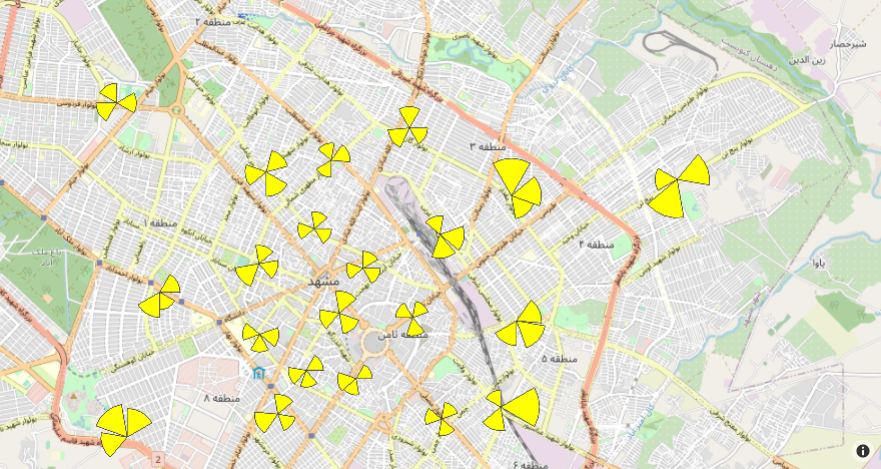